<p style="text-align: center"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from file

In [34]:
df = pd.read_csv("adult_eda.csv")

# Try to undersstand what the data looks like? What are types of the features? Are there any missing values? Do I need to eliminate some features?  

In [35]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [36]:
df.shape

(32561, 15)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     31759 non-null float64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      27493 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [38]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,31759.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.082843,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.576172,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [39]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

---
---

# Look at the value counts of columns that have object datatype and replace '?' like values with 'Unknown' word.  

In [40]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [41]:
df.select_dtypes(include='object').describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,27493,32561,32561,32561,32561
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [10]:
#look at workclass column here


Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [42]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [43]:
pd.options.display.max_rows=20
df[df.isin(['?'])].any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary            False
dtype: bool

In [46]:
df.workclass = df.workclass.str.replace('?','Unknown')

In [47]:
pd.options.display.max_rows=20
df[df.isin(['?'])].any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary            False
dtype: bool

In [48]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [49]:
df[df.isin(['?'])].any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary            False
dtype: bool

In [50]:
#replace all '?' in whole df with 'Unknown'
df.replace('?','Unknown',inplace=True)

In [53]:
df[df.isin(['?'])].any()
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


---
---

# Do education and education_num columns hold similar information? If so drop the appropriate choice between them.

In [54]:
df.education

0           Bachelors
1           Bachelors
2             HS-grad
3                11th
4           Bachelors
5             Masters
6                 9th
7             HS-grad
8             Masters
9           Bachelors
             ...     
32551            10th
32552       Assoc-voc
32553         Masters
32554         Masters
32555    Some-college
32556      Assoc-acdm
32557         HS-grad
32558         HS-grad
32559         HS-grad
32560         HS-grad
Name: education, Length: 32561, dtype: object

In [55]:
df['education-num']

0        13.0
1        13.0
2         9.0
3         7.0
4        13.0
5        14.0
6         5.0
7         9.0
8        14.0
9        13.0
         ... 
32551     6.0
32552    11.0
32553    14.0
32554    14.0
32555    10.0
32556    12.0
32557     9.0
32558     9.0
32559     9.0
32560     9.0
Name: education-num, Length: 32561, dtype: float64

In [57]:
df.groupby('education')['education-num'].value_counts()

education     education-num
10th          6.0                916
11th          7.0               1146
12th          8.0                424
1st-4th       2.0                161
5th-6th       3.0                330
7th-8th       4.0                631
9th           5.0                503
Assoc-acdm    12.0              1044
Assoc-voc     11.0              1343
Bachelors     13.0              5247
Doctorate     16.0               405
HS-grad       9.0              10215
Masters       14.0              1687
Preschool     1.0                 50
Prof-school   15.0               559
Some-college  10.0              7098
Name: education-num, dtype: int64

In [58]:
df['education-num'].value_counts()

9.0     10215
10.0     7098
13.0     5247
14.0     1687
11.0     1343
7.0      1146
12.0     1044
6.0       916
4.0       631
15.0      559
5.0       503
8.0       424
16.0      405
3.0       330
2.0       161
1.0        50
Name: education-num, dtype: int64

In [60]:
#drop one of them here
df.drop(columns='education-num',inplace=True,axis=1)

In [62]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

---
---

# Take a look at correlation between variables and also see if there are some outliers in any of the columns.

In [65]:
df.corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768
capital-gain,0.077674,0.000432,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.078409,0.054256,1.000000


In [67]:
df.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


In [83]:
#age column
IQR_age = np.quantile(df.age,0.75) - np.quantile(df.age,0.25)
IQR_age

20.0

In [73]:
from scipy import stats as st
st.iqr(df.age)

20.0

In [75]:
upper_lim = np.quantile(df.age,0.75) + 1.5 * IQR
upper_lim

78.0

In [77]:
df[df["age"] >=   78  ]["age"].value_counts()

90    43
78    23
80    22
79    22
81    20
82    12
84    10
83     6
88     3
85     3
87     1
86     1
Name: age, dtype: int64

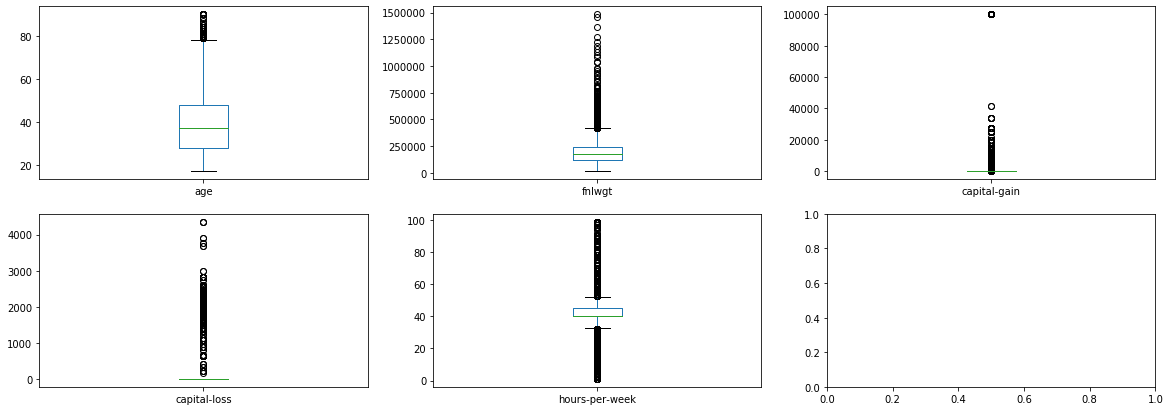

In [78]:
fig ,ax = plt.subplots(2,3,figsize=(20,7))
x = 0
y = 0
for column in df.select_dtypes('number').columns:
    
    df[column].plot(kind = "box", ax = ax[x,y])
    if y < 2:
        y += 1
    else:
        x += 1
        y = 0

In [79]:
df[(df["hours-per-week"] == 99)].sample(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
30610,51,Self-emp-not-inc,24790,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,99,United-States,>50K
13858,37,Private,51264,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,France,>50K
22216,45,Private,54260,Some-college,Divorced,Craft-repair,Unmarried,White,Male,0,0,99,United-States,<=50K
1172,25,Private,404616,Masters,Married-civ-spouse,Farming-fishing,Not-in-family,White,Male,0,0,99,United-States,>50K
19731,34,Federal-gov,345259,Doctorate,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,United-States,<=50K
6618,27,Private,336951,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,99,United-States,<=50K
25354,65,Private,89681,Masters,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,99,United-States,<=50K
11833,58,Private,164857,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,99,United-States,<=50K
23398,66,Private,28367,Bachelors,Married-civ-spouse,Priv-house-serv,Other-relative,White,Male,0,0,99,United-States,<=50K
31699,43,Self-emp-not-inc,163108,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K


In [80]:
#hours per week column
IQR = np.quantile(df['hours-per-week'],0.75) - np.quantile(df['hours-per-week'],0.25)
IQR

5.0

In [81]:
upper_lim= np.quantile(df['hours-per-week'],0.75)+ 1.5*IQR
upper_lim

52.5

In [ ]:
# find outlier values which extends the upper limit in both age and hours-per-week columns

In [86]:
# Age upper limit is already calcu78 and working hour upper limit is 52.5

df[(df.age>78) & (df['hours-per-week']>52.5)]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
3777,80,Private,87518,Some-college,Never-married,Prof-specialty,Not-in-family,White,Male,0,1816,60,United-States,<=50K
5370,90,Local-gov,227796,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,>50K
7481,83,Private,195507,HS-grad,Widowed,Protective-serv,Not-in-family,White,Male,0,0,55,United-States,<=50K
7720,84,Private,241065,Masters,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,66,United-States,<=50K
8806,90,Private,87372,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,>50K
11996,90,Private,40388,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,<=50K
12830,81,Private,201398,Masters,Widowed,Prof-specialty,Unmarried,White,Male,0,0,60,Unknown,<=50K
15356,90,Private,90523,HS-grad,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K
24395,83,Self-emp-inc,153183,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2392,55,United-States,>50K


# After looking at the outliers you can drop the rows which actually does not make any sense. 
** Hint: You can check age and hours per week columns. **

In [94]:
drop_index=df[(df.age>78) & (df['hours-per-week']>52.5)].index
drop_index

Int64Index([3777, 5370, 7481, 7720, 8806, 11996, 12830, 15356, 24395], dtype='int64')

In [95]:
df.drop(drop_index, axis=0, inplace=True)

In [96]:
# check outlier values which extends the upper limit in both age and hours-per-week columns
df[(df.age>78) & (df['hours-per-week']>52.5)]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


# Impute missing values in relationship column with 'Unmarried'. Also replace 'Not-in-family','Other-relative' values in this column with 'Unmarried'?

In [197]:
df.relationship.value_counts()

Husband           13190
Not-in-family      8301
Unmarried          3444
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [198]:
df.replace(['Not-in-family','Other-relative'],'Unmarried',inplace=True)

In [199]:
df.relationship.value_counts()

Husband      13190
Unmarried    12726
Wife          1568
Name: relationship, dtype: int64

---
# How many of each race are represented in this dataset?
---

In [206]:
race_count = df.race.value_counts()
race_count

White                 27807
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

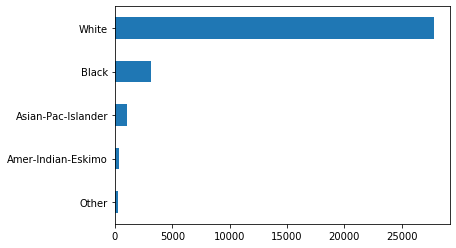

In [207]:
race_count.sort_values().plot.barh();

---
# What is the average age of men/women?
---

In [208]:
average_age_men = df.loc[df.sex=='Male','age'].mean()
average_age_men

39.41444378127726

In [209]:
average_age_men_1 = df[df.sex=='Male']['age'].mean()
average_age_men_1

39.41444378127726

In [210]:
round(average_age_men,1)

39.4

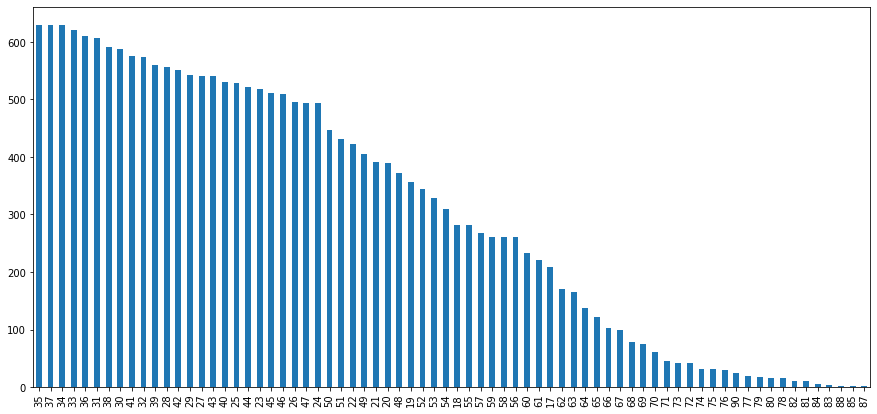

In [104]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Male", "age"].value_counts().plot.bar();

In [105]:
average_age_women = df.loc[df.sex=='Female','age'].mean()
average_age_women 

36.85823043357163

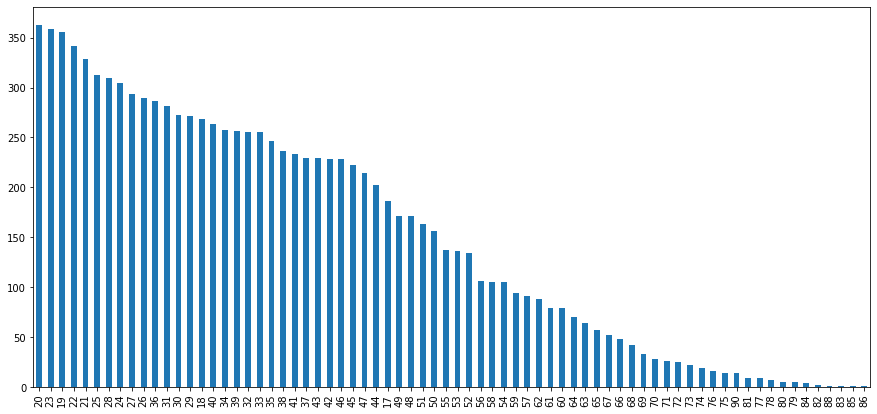

In [106]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Female", "age"].value_counts().plot.bar();

---
# What is the percentage of people who have a Bachelor's degree?
---

In [108]:
df.groupby('education').education.count()

education
10th              933
11th             1175
12th              433
1st-4th           168
5th-6th           333
7th-8th           646
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5353
Doctorate         413
HS-grad         10499
Masters          1720
Preschool          51
Prof-school       575
Some-college     7290
Name: education, dtype: int64

In [110]:
df.education.value_counts()

HS-grad         10499
Some-college     7290
Bachelors        5353
Masters          1720
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       575
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [112]:
upper = df.groupby('education').education.count().loc['Bachelors']

lower = df.groupby('education').education.count().sum()

percentage_bachelors = upper / lower * 100

percentage_bachelors

16.44445809781273

In [113]:
df["education"].value_counts(normalize=True)

HS-grad         0.322530
Some-college    0.223949
Bachelors       0.164445
Masters         0.052839
Assoc-voc       0.042455
11th            0.036096
Assoc-acdm      0.032778
10th            0.028662
7th-8th         0.019845
Prof-school     0.017664
9th             0.015790
12th            0.013302
Doctorate       0.012687
5th-6th         0.010230
1st-4th         0.005161
Preschool       0.001567
Name: education, dtype: float64

In [114]:
percentage_bachelors = df["education"].value_counts(normalize=True).loc["Bachelors"]*100
round(percentage_bachelors,1)

16.4

In [115]:
print(f"The percentage of people who have a Bachelor's degree : %{round(percentage_bachelors,1)}")

The percentage of people who have a Bachelor's degree : %16.4


---
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
---

In [118]:
df.salary.value_counts()

<=50K    24714
>50K      7838
Name: salary, dtype: int64

In [119]:
df.education.value_counts()

HS-grad         10499
Some-college     7290
Bachelors        5353
Masters          1720
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       575
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [121]:
higher_education = (df.education == 'Bachelors') | (df.education == 'Masters') | (df.education == 'Doctorate')
higher_education

0         True
1         True
2        False
3        False
4         True
5         True
6        False
7        False
8         True
9         True
         ...  
32551    False
32552    False
32553     True
32554     True
32555    False
32556    False
32557    False
32558    False
32559    False
32560    False
Name: education, Length: 32552, dtype: bool

In [123]:
df_high_edu = df[higher_education]
df_high_edu

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
12,23,Private,122272,Bachelors,Never-married,Adm-clerical,NaN,White,Female,0,0,30,United-States,<=50K
19,43,Self-emp-not-inc,292175,Masters,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
20,40,Private,193524,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K


In [126]:
df_high_edu[df_high_edu['salary']=='>50K']

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
8,31,Private,45781,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
19,43,Self-emp-not-inc,292175,Masters,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
20,40,Private,193524,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
25,56,Local-gov,216851,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
45,57,Federal-gov,337895,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,40,United-States,>50K
53,50,Federal-gov,251585,Bachelors,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,>50K
63,42,Private,116632,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,>50K
72,29,Self-emp-not-inc,162298,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,0,0,70,United-States,>50K


In [133]:
# df_high_edu[df_high_edu['salary']=='>50K'].shape[0]
count = df_high_edu[df_high_edu['salary']=='>50K'].education.count()
count

3484

In [136]:
perc_high_edu = count / len(df)

In [137]:
perc_high_edu

0.10702875399361023

In [138]:
print(f"Percentage of people with advanced education make more than 50K : {round(perc_high_edu * 100, 2)}")

Percentage of people with advanced education make more than 50K : 10.7


---
# What percentage of people without advanced education make more than 50K?
---

In [139]:
lower_education = ~higher_education

In [140]:
df_low_edu = df[lower_education] 
df_low_edu

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
13,32,Private,205019,Assoc-acdm,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
14,40,Private,121772,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,Unknown,>50K
15,34,Private,245487,7th-8th,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K
16,25,Self-emp-not-inc,176756,HS-grad,Never-married,Farming-fishing,NaN,White,Male,0,0,35,United-States,<=50K
17,32,Private,186824,HS-grad,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K


In [141]:
df_low_edu[df_low_edu.salary == '>50K']

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
14,40,Private,121772,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,Unknown,>50K
27,54,Unknown,180211,Some-college,Married-civ-spouse,Unknown,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,Unknown,>50K
52,47,Private,51835,Prof-school,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
55,43,Private,237993,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
67,53,Private,169846,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
68,49,Self-emp-inc,191681,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
84,44,Private,343591,HS-grad,Divorced,Craft-repair,Not-in-family,White,Female,14344,0,40,United-States,>50K


In [149]:
count=df_low_edu[df_low_edu.salary == '>50K'].salary.shape[0]

In [150]:
count

4354

In [151]:
perc_low_edu = count / len(df)

In [152]:
print(f"Percentage of people without advanced education make more than 50K : {round(perc_low_edu * 100 ,2)}")

Percentage of people without advanced education make more than 50K : 13.38


In [153]:
if perc_high_edu > perc_low_edu :
    print("More education more money!")
else:
    print("Education has no clear effet on salary. You should investigate some other features also.")

Education has no clear effet on salary. You should investigate some other features also.


---
# What percentage of the people who work the minimum number of hours per week have a salary of >50K?
---

In [154]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [155]:
df['hours-per-week'].value_counts()

40    15217
50     2819
45     1824
60     1472
35     1297
20     1224
30     1149
55      691
25      674
48      517
      ...  
97        2
88        2
86        2
61        2
95        2
92        1
94        1
87        1
74        1
82        1
Name: hours-per-week, Length: 94, dtype: int64

In [156]:
lazy_riches = (df['hours-per-week'] == df['hours-per-week'].min()) & (df.salary == '>50K' )
lazy_riches

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
         ...  
32551    False
32552    False
32553    False
32554    False
32555    False
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32552, dtype: bool

In [157]:
df[lazy_riches]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
189,58,State-gov,109567,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K
20072,65,Unknown,76043,HS-grad,Married-civ-spouse,Unknown,Husband,White,Male,0,0,1,United-States,>50K


In [158]:
num_lazy_riches = len(df[lazy_riches])
num_lazy_riches

2

In [161]:
num_min_workers = len(df[(df['hours-per-week'] == df['hours-per-week'].min())])
num_min_workers

20

In [162]:
print (f"Percentage of the people who work the minimum number of hours per week have a salary of >50K : % {round(num_lazy_riches/num_min_workers*100)}")

Percentage of the people who work the minimum number of hours per week have a salary of >50K : % 10


 ---
 # What country has the highest percentage of people that earn >50K?
 ---


In [165]:
country_salary_df = df.groupby('native-country')[['salary']].count()
country_salary_df

,salary
native-country,
Cambodia,19
Canada,121
China,75
Columbia,59
Cuba,95
Dominican-Republic,70
Ecuador,28
El-Salvador,106
England,90


In [168]:
country_salary_df_riches = df[df.salary=='>50K'].groupby('native-country')[['salary']].count()
country_salary_df_riches

,salary
native-country,
Cambodia,7
Canada,39
China,20
Columbia,2
Cuba,25
Dominican-Republic,2
Ecuador,4
El-Salvador,9
England,30


In [170]:
rich_per_country = (country_salary_df_riches/country_salary_df).sort_values('salary')
rich_per_country

,salary
native-country,
Dominican-Republic,0.028571
Columbia,0.033898
Guatemala,0.046875
Mexico,0.051322
Nicaragua,0.058824
Peru,0.064516
Vietnam,0.074627
Honduras,0.076923
El-Salvador,0.084906


In [173]:
rich_per_country[rich_per_country.salary == rich_per_country.salary.max()]

,salary
native-country,
Iran,0.418605


In [178]:
#use iloc here
rich_per_country.sort_values('salary',ascending=False).iloc[0:1]

,salary
native-country,
Iran,0.418605


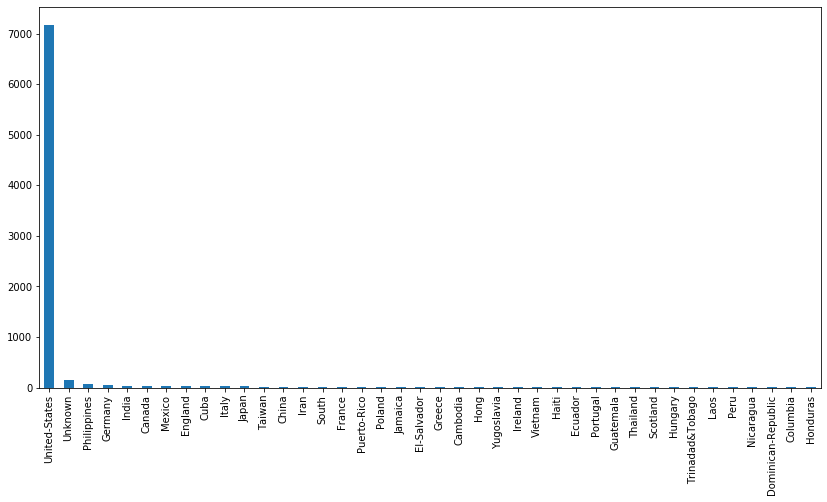

In [179]:
plt.figure(figsize=(14,7))
df.loc[df["salary"] == ">50K", "native-country"].value_counts().plot(kind="bar");

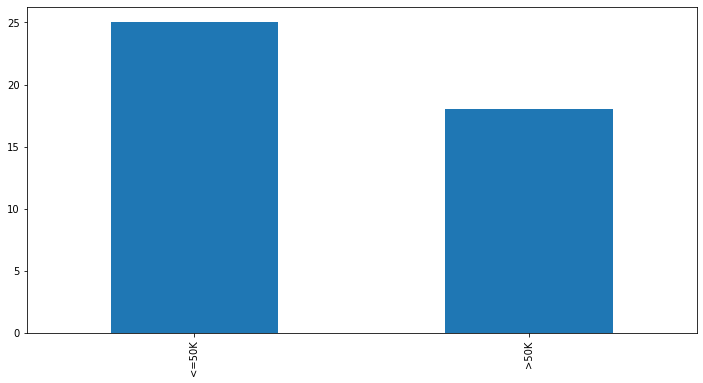

In [180]:
plt.figure(figsize=(12,6))
df.loc[((df["native-country"] == "Iran")), "salary"].value_counts().plot.bar();

---
# Identify the most popular occupation for those who earn >50K in India.
---

In [187]:
top_IN_occupation = (df["native-country"]=="India") & (df["salary"] == ">50K")

top_IN_occupation
# df.head()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
         ...  
32551    False
32552    False
32553    False
32554    False
32555    False
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32552, dtype: bool

In [188]:
df[top_IN_occupation]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
968,48,Private,164966,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
1327,52,Private,168381,HS-grad,Widowed,Other-service,Unmarried,Asian-Pac-Islander,Female,0,0,40,India,>50K
7258,42,State-gov,102343,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,72,India,>50K
7285,54,State-gov,93449,Masters,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
8124,36,Private,172104,Prof-school,Never-married,Prof-specialty,Not-in-family,Other,Male,0,0,40,India,>50K
9939,43,Federal-gov,325706,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,50,India,>50K
10590,35,Private,98283,Prof-school,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,0,0,40,India,>50K
10661,59,Private,122283,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,99999,0,40,India,>50K
10736,30,Private,243190,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,20,India,>50K


In [189]:
df[top_IN_occupation]['occupation'].value_counts()

Prof-specialty      25
Exec-managerial      8
Tech-support         2
Other-service        2
Adm-clerical         1
Sales                1
Transport-moving     1
Name: occupation, dtype: int64

In [193]:
df[top_IN_occupation]['occupation'].value_counts().index[0]

'Prof-specialty'

In [195]:
a = df[top_IN_occupation]['occupation'].mode()[0]
a

'Prof-specialty'

In [196]:
print(f"{a} the most popular occupation for those who earn >50K in India.")

Prof-specialty the most popular occupation for those who earn >50K in India.


----
---